In [2]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
sb.set()

In [3]:
seizuredf = pd.read_csv('data.csv')

In [4]:
cols = seizuredf.columns #assign column names to cols
y_col = seizuredf.y #extracting the last column of the dataset
y_col[y_col>1]=0 # assign all the values > 1 in the column to 0
non_seizure, seizure = y_col.value_counts()
print('The number of trials for the non-seizure class is:', non_seizure)
print('The number of trials for the seizure class is:', seizure)

The number of trials for the non-seizure class is: 9200
The number of trials for the seizure class is: 2300


C:\Users\stuff\AppData\Local\Temp\ipykernel_41844\3502740708.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y_col[y_col>1]=0 # assign all the values > 1 in the column to 0


In [5]:
X = seizuredf.iloc[:,1:179]
#y = y_col.copy

In [6]:
# Import Decision Tree Classifier model from Scikit-Learn
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

# Create a Decision Tree Classifier object
dectree = DecisionTreeClassifier(max_depth = 4)

X_train, X_test, y_train, y_test = train_test_split(X,y_col,test_size = 0.2)

In [7]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
#X_train = sc.fit_transform(X_train)
#X_test = sc.transform(X_test)

In [8]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_old = X_train
X_test_old = X_test

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [9]:
dectree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4)

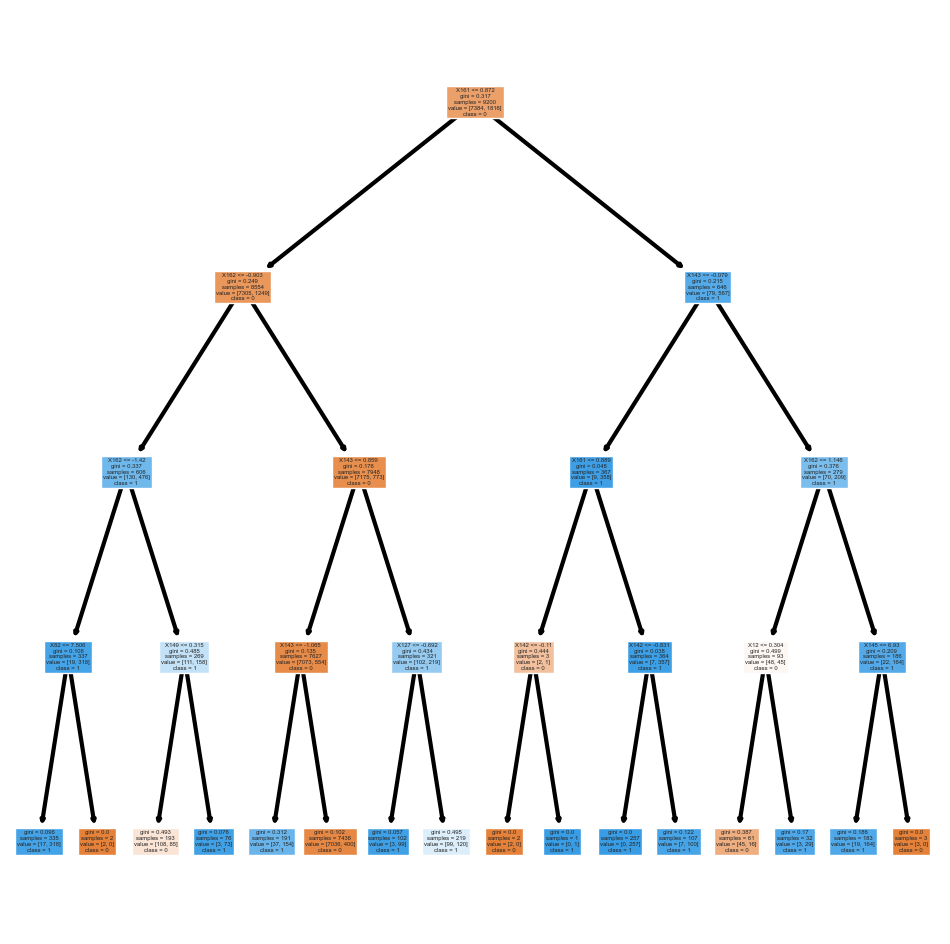

In [10]:
from sklearn.tree import plot_tree
fig, ax = plt.subplots(figsize=(12, 12))
out = plot_tree(dectree, 
          feature_names = X_train_old.columns,
          class_names = [str(x) for x in dectree.classes_],
          filled=True)

for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor('black')
        arrow.set_linewidth(3)
        
plt.show()

Classification Accuracy 	: 0.9095652173913044


<AxesSubplot:>

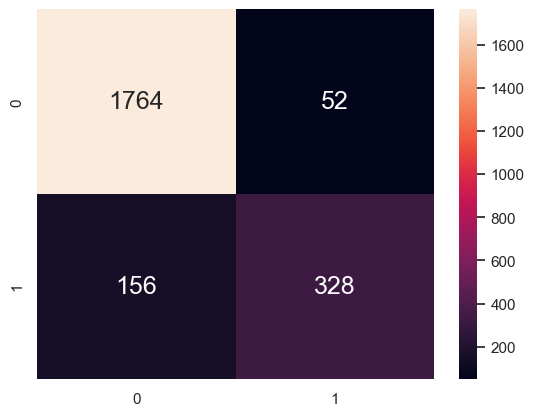

In [11]:
# Predict the Response corresponding to Predictors
y_test_pred = dectree.predict(X_test)

# Print the Classification Accuracy
print("Classification Accuracy \t:", dectree.score(X_test, y_test))

# Plot the two-way Confusion Matrix
from sklearn.metrics import confusion_matrix
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

In [12]:
#logistic regression
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()
clf.fit(X_train, y_train)
y_pred_log_reg = clf.predict(X_test)
acc_log_reg = round(clf.score(X_train, y_train) * 100, 2)
print (str(acc_log_reg) + ' %')

82.91 %


c:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Classification Accuracy 	: 82.91


<AxesSubplot:>

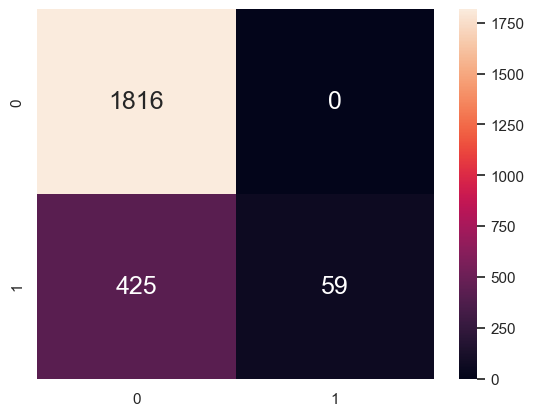

In [13]:
# Predict the Response corresponding to Predictors
y_test_pred = clf.predict(X_test)

# Print the Classification Accuracy
print("Classification Accuracy \t:", acc_log_reg )

# Plot the two-way Confusion Matrix
from sklearn.metrics import confusion_matrix
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

In [14]:
from sklearn.svm import SVC
clf = SVC()
clf.fit(X_train, y_train)
y_pred_svc = clf.predict(X_test)
acc_svc = round(clf.score(X_train, y_train) * 100, 2)
print (str(acc_svc) + '%')

98.3%


Classification Accuracy 	: 98.3


<AxesSubplot:>

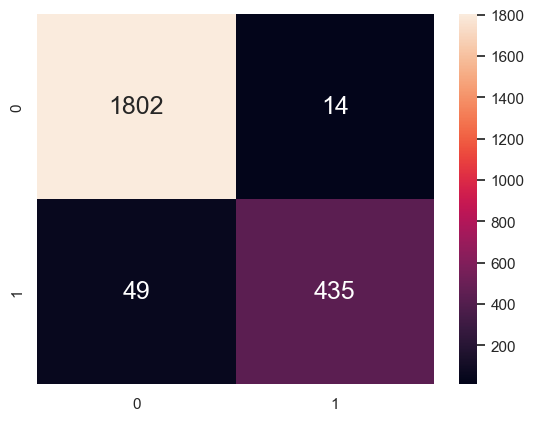

In [15]:
# Predict the Response corresponding to Predictors
y_test_pred = clf.predict(X_test)

# Print the Classification Accuracy
print("Classification Accuracy \t:", acc_svc )

# Plot the two-way Confusion Matrix
from sklearn.metrics import confusion_matrix
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

82.67%


c:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


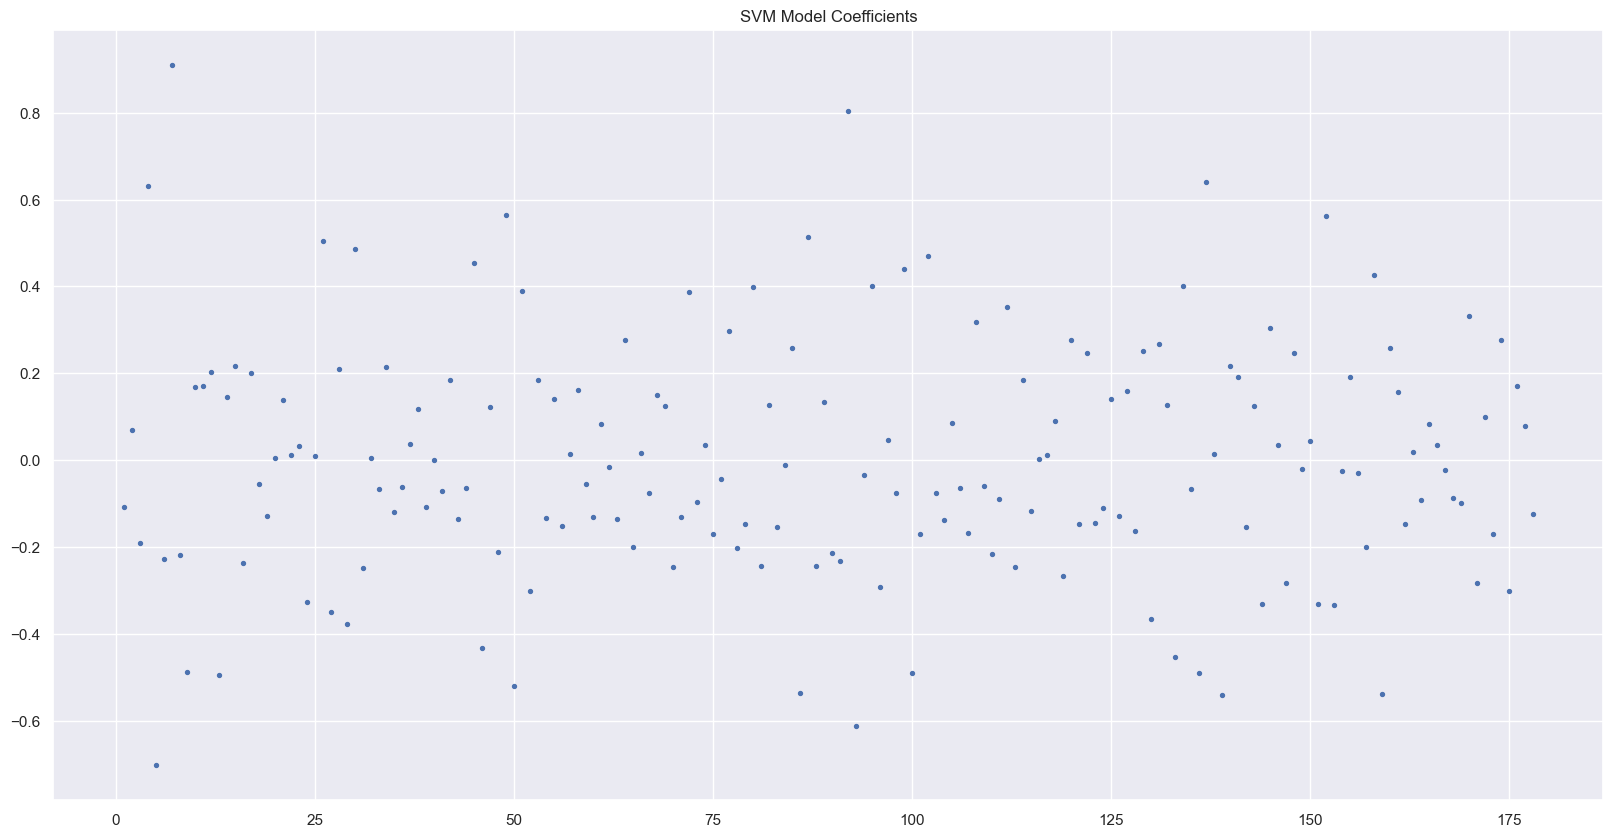

In [16]:
from sklearn.svm import SVC, LinearSVC
clf = LinearSVC()
clf.fit(X_train, y_train)
y_pred_linear_svc = clf.predict(X_test)
acc_linear_svc = round(clf.score(X_train, y_train) * 100, 2)
print (str(acc_linear_svc) + '%')
# get the coefficients of the SVM model
coef = clf.coef_

# plot a heatmap of the coefficients
fig, ax = plt.subplots(figsize=(20, 10))
plt.scatter(y=coef,x=np.arange(1,179,1),vmax=np.max(coef),vmin=np.min(coef),s=8)
plt.title('SVM Model Coefficients')
plt.show()


Classification Accuracy 	: 82.67


<AxesSubplot:>

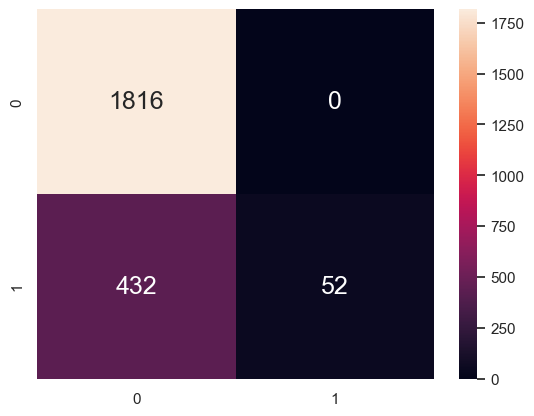

In [17]:
# Predict the Response corresponding to Predictors
y_test_pred = clf.predict(X_test)

# Print the Classification Accuracy
print("Classification Accuracy \t:", acc_linear_svc )

# Plot the two-way Confusion Matrix
from sklearn.metrics import confusion_matrix
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

c:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

94.13%


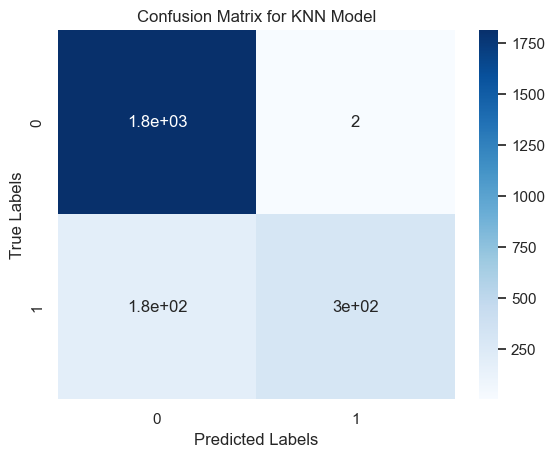

In [18]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier()
clf.fit(X_train, y_train)
y_pred_knn = clf.predict(X_test)
acc_knn = round(clf.score(X_train, y_train) * 100, 2)
print (str(acc_knn)+'%')
cm = confusion_matrix(y_test, y_pred_knn)

# plot the confusion matrix as a heatmap
sb.heatmap(cm, annot=True, cmap="Blues")
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for KNN Model')
plt.show()

Classification Accuracy 	: 94.13


c:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


<AxesSubplot:>

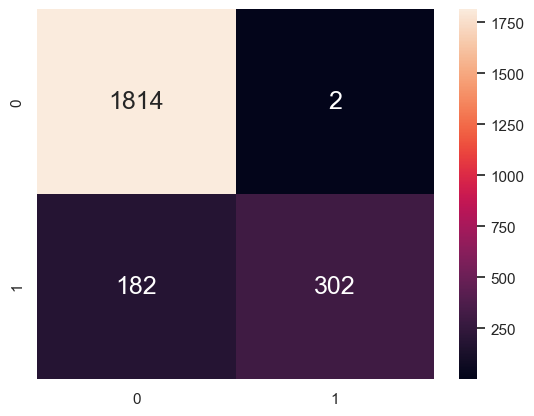

In [19]:
# Predict the Response corresponding to Predictors
y_test_pred = clf.predict(X_test)

# Print the Classification Accuracy
print("Classification Accuracy \t:", acc_knn )

# Plot the two-way Confusion Matrix
from sklearn.metrics import confusion_matrix
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

In [20]:
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()
clf.fit(X_train, y_train)
y_pred_gnb = clf.predict(X_test)
acc_gnb = round(clf.score(X_train, y_train) * 100, 2)
print (str(acc_gnb) + '%')

95.6%


Classification Accuracy 	: 95.6


<AxesSubplot:>

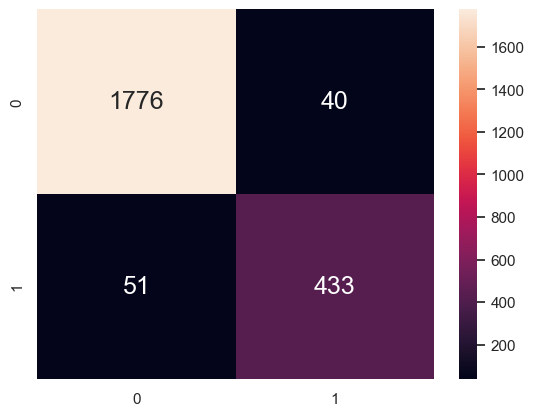

In [21]:
# Predict the Response corresponding to Predictors
y_test_pred = clf.predict(X_test)

# Print the Classification Accuracy
print("Classification Accuracy \t:", acc_gnb )

# Plot the two-way Confusion Matrix
from sklearn.metrics import confusion_matrix
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})